## This code merges the social security baby names dataset, creates a clean dataframe, conducts analysis using matplotlib and statiscal testing (linear regression, chi-square).

## Summary Findings:
### - We reject the null hypothesis that GoT does not have an affect on baby names. A statistical significant p-value < 0.05 on linear regression test show that there was a factor in the increase of females named 'Arya' from 2011 to 2017.
### - Only females named 'Arya' (as the character in GoT), had a significant increase from 2011 to 2017. There was no effect on males named 'Arya'.
### - When we followed similarly ranked females with Arya in 2011 to 2017, they did not follow the same increase as Arya in 2017. 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
from scipy import stats
import os


print(os.listdir("Resources/names"))

['yob2000.txt', 'yob2014.txt', 'yob2015.txt', 'yob2001.txt', 'yob2017.txt', 'yob2003.txt', 'yob2002.txt', 'yob2016.txt', 'yob2012.txt', 'yob2006.txt', 'yob2007.txt', 'yob2013.txt', 'yob2005.txt', 'yob2011.txt', 'yob2010.txt', 'yob2004.txt', 'yob1973.txt', 'yob1998.txt', 'yob1999.txt', 'yob1972.txt', 'yob1970.txt', 'yob1971.txt', 'yob1975.txt', 'yob1974.txt', 'yob1976.txt', 'yob1989.txt', 'yob1988.txt', 'yob1977.txt', 'yob1991.txt', 'yob1985.txt', 'yob1984.txt', 'yob1990.txt', 'yob1979.txt', 'yob1986.txt', 'yob1992.txt', 'yob1993.txt', 'yob1987.txt', 'yob1978.txt', 'yob1983.txt', 'yob1997.txt', 'yob1996.txt', 'yob1982.txt', 'yob1994.txt', 'yob1980.txt', 'yob1981.txt', 'yob1995.txt', 'yob2009.txt', '.ipynb_checkpoints', 'yob2008.txt', 'NationalReadMe.pdf']


In [2]:
#create year column
year = []
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        namefile = pd.read_csv(f"Resources/names/{filename}",header=None)
        namefile['year'] = os.path.splitext(filename)[0][-4:]
        year.append(namefile)

#data is in series, merge all years together
df = pd.concat(year)

In [3]:
#view df
df.head()

0  1      2  year
0    Emily  F  25953  2000
1   Hannah  F  23080  2000
2  Madison  F  19967  2000
3   Ashley  F  17997  2000
4    Sarah  F  17697  2000

In [4]:
#rename columns
name_df = df.rename(columns={
    0:'name',
    1:'gender',
    2:'count'
})
name_df.head()

name gender  count  year
0    Emily      F  25953  2000
1   Hannah      F  23080  2000
2  Madison      F  19967  2000
3   Ashley      F  17997  2000
4    Sarah      F  17697  2000

In [5]:
#check datatypes
name_df.dtypes

name      object
gender    object
count      int64
year      object
dtype: object

In [6]:
#count of total babies born in the year
yearTotal_df = name_df.groupby('year').sum().rename(columns={'count':'yearTotal'})

In [7]:
#view df
yearTotal_df.head()

yearTotal
year           
2000    3778079
2001    3741451
2002    3736042
2003    3799971
2004    3818361

In [8]:
#merge total babies born in year and unique names
name_df = name_df.merge(yearTotal_df,on='year')
name_df.head()

name gender  count  year  yearTotal
0    Emily      F  25953  2000    3778079
1   Hannah      F  23080  2000    3778079
2  Madison      F  19967  2000    3778079
3   Ashley      F  17997  2000    3778079
4    Sarah      F  17697  2000    3778079

In [9]:
#Calculate % of name
name_df['name_percent'] = 100*(name_df.loc[:,'count']/name_df.loc[:,'yearTotal'])
name_df.head()

arya_df = name_df[name_df['name']=='Arya'][['name','count','gender','year']]
arya_df.head()

name  count gender  year
3741   Arya     34      F  2000
19792  Arya     47      M  2000
29984  Arya   1553      F  2014
50757  Arya     82      M  2014
63197  Arya   1641      F  2015

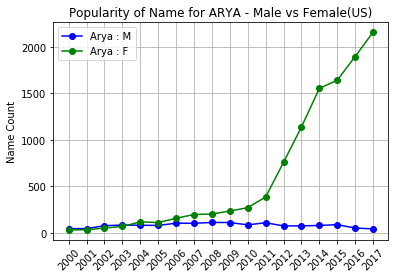

In [10]:
#set male and female dataframe
arya_f_df = arya_df[arya_df['gender']=='F'].copy().sort_values('year')
arya_m_df = arya_df[arya_df['gender']=='M'].copy().sort_values('year')
arya_m_plot = plt.plot(arya_m_df['year'],arya_m_df['count'],c='b',marker='o',label='Arya : M')
arya_f_plot = plt.plot(arya_f_df['year'],arya_f_df['count'],c='g',marker='o',label='Arya : F')
plt.xticks(rotation=45)
plt.grid()
plt.title("Popularity of Name for ARYA - Male vs Female(US)")
plt.ylabel("Name Count")
plt.legend()
plt.savefig("Graph_Images/GoT/arya_male_vs_female.png")

In [11]:
#linear regression - female
slope, intercept, r_value, p_value, std_err = stats.linregress(arya_f_df['year'].astype(int),arya_f_df['count'])
print(f"female regression: {p_value}")

female regression: 1.145035736644725e-06


In [12]:
#linear regression - female
slope, intercept, r_value, p_value, std_err = stats.linregress(arya_m_df['year'].astype(int),arya_m_df['count'])
print(f"male regression: {p_value}")

male regression: 0.9769616082011879


In [13]:
#Get top 5 female names in year 2011
female_y2011 = name_df[(name_df['gender']=='F') & (name_df['year']=='2011')] 
female_y2011 = female_y2011.sort_values('count',ascending=False)
female_y2011['rank'] = female_y2011['name_percent'].rank(ascending=False)
female_y2011.head(10)

name gender  count  year  yearTotal  name_percent  rank
422137    Sophia      F  21837  2011    3651914      0.597960   1.0
422138  Isabella      F  19901  2011    3651914      0.544947   2.0
422139      Emma      F  18797  2011    3651914      0.514716   3.0
422140    Olivia      F  17321  2011    3651914      0.474299   4.0
422141       Ava      F  15496  2011    3651914      0.424325   5.0
422142     Emily      F  14251  2011    3651914      0.390234   6.0
422143   Abigail      F  13247  2011    3651914      0.362741   7.0
422144   Madison      F  12381  2011    3651914      0.339028   8.0
422145       Mia      F  11527  2011    3651914      0.315643   9.0
422146     Chloe      F  10988  2011    3651914      0.300883  10.0

In [14]:
#Rank 2017 females
female_y2017 = name_df[(name_df['gender']=='F') & (name_df['year']=='2017')] 
female_y2017 = female_y2017.sort_values('count',ascending=False)
female_y2017['rank'] = female_y2017['name_percent'].rank(ascending=False)
female_y2017.head(10)

name gender  count  year  yearTotal  name_percent  rank
126364       Emma      F  19738  2017    3546301      0.556580   1.0
126365     Olivia      F  18632  2017    3546301      0.525393   2.0
126366        Ava      F  15902  2017    3546301      0.448411   3.0
126367   Isabella      F  15100  2017    3546301      0.425796   4.0
126368     Sophia      F  14831  2017    3546301      0.418210   5.0
126369        Mia      F  13437  2017    3546301      0.378902   6.0
126370  Charlotte      F  12893  2017    3546301      0.363562   7.0
126371     Amelia      F  11800  2017    3546301      0.332741   8.0
126372     Evelyn      F  10675  2017    3546301      0.301018   9.0
126373    Abigail      F  10551  2017    3546301      0.297521  10.0

In [15]:
#merge 2011 vs 2017
merge_female = female_y2011.merge(female_y2017,on='name',suffixes=('_y2011','_y2017'))
merge_female['rankChange'] = merge_female['rank_y2017'] - merge_female['rank_y2011']
merge_female['percentChange'] = merge_female['name_percent_y2017'] - merge_female['name_percent_y2011']
merge_female['countChange'] = merge_female['count_y2017'] - merge_female['count_y2011']
merge_female.head(10)

name gender_y2011  count_y2011 year_y2011  yearTotal_y2011  \
0    Sophia            F        21837       2011          3651914   
1  Isabella            F        19901       2011          3651914   
2      Emma            F        18797       2011          3651914   
3    Olivia            F        17321       2011          3651914   
4       Ava            F        15496       2011          3651914   
5     Emily            F        14251       2011          3651914   
6   Abigail            F        13247       2011          3651914   
7   Madison            F        12381       2011          3651914   
8       Mia            F        11527       2011          3651914   
9     Chloe            F        10988       2011          3651914   

   name_percent_y2011  rank_y2011 gender_y2017  count_y2017 year_y2017  \
0            0.597960         1.0            F        14831       2017   
1            0.544947         2.0            F        15100       2017   
2            0.514716         3.0            F        19738       2017   
3            0.474299         4.0            F        18632       2017   
4            0.424325         5.0            F        15902       2017   
5            0.390234         6.0            F         9746       2017   
6            0.362741         7.0            F        10551       2017   
7            0.339028         8.0            F         7847       2017   
8            0.315643         9.0            F        13437       2017   
9            0.300883        10.0            F         6912       2017   

   yearTotal_y2017  name_percent_y2017  rank_y2017  rankChange  percentChange  \
0          3546301            0.418210         5.0         4.0      -0.179750   
1          3546301            0.425796         4.0         2.0      -0.119151   
2          3546301            0.556580         1.0        -2.0       0.041864   
3          3546301            0.525393         2.0        -2.0       0.051093   
4          3546301            0.448411         3.0        -2.0       0.024085   
5          3546301            0.274822        12.0         6.0      -0.115412   
6          3546301            0.297521        10.0         3.0      -0.065220   
7          3546301            0.221273        17.0         9.0      -0.117755   
8          3546301            0.378902         6.0        -3.0       0.063259   
9          3546301            0.194907        22.0        12.0      -0.105976   

   countChange  
0        -7006  
1        -4801  
2          941  
3         1311  
4          406  
5        -4505  
6        -2696  
7        -4534  
8         1910  
9        -4076

In [16]:
#dataframe for top 5 and top 10 Y2011 females only
top5_df = merge_female.head(5)

top10_df = merge_female.head(10)
top10_df

name gender_y2011  count_y2011 year_y2011  yearTotal_y2011  \
0    Sophia            F        21837       2011          3651914   
1  Isabella            F        19901       2011          3651914   
2      Emma            F        18797       2011          3651914   
3    Olivia            F        17321       2011          3651914   
4       Ava            F        15496       2011          3651914   
5     Emily            F        14251       2011          3651914   
6   Abigail            F        13247       2011          3651914   
7   Madison            F        12381       2011          3651914   
8       Mia            F        11527       2011          3651914   
9     Chloe            F        10988       2011          3651914   

   name_percent_y2011  rank_y2011 gender_y2017  count_y2017 year_y2017  \
0            0.597960         1.0            F        14831       2017   
1            0.544947         2.0            F        15100       2017   
2            0.514716         3.0            F        19738       2017   
3            0.474299         4.0            F        18632       2017   
4            0.424325         5.0            F        15902       2017   
5            0.390234         6.0            F         9746       2017   
6            0.362741         7.0            F        10551       2017   
7            0.339028         8.0            F         7847       2017   
8            0.315643         9.0            F        13437       2017   
9            0.300883        10.0            F         6912       2017   

   yearTotal_y2017  name_percent_y2017  rank_y2017  rankChange  percentChange  \
0          3546301            0.418210         5.0         4.0      -0.179750   
1          3546301            0.425796         4.0         2.0      -0.119151   
2          3546301            0.556580         1.0        -2.0       0.041864   
3          3546301            0.525393         2.0        -2.0       0.051093   
4          3546301            0.448411         3.0        -2.0       0.024085   
5          3546301            0.274822        12.0         6.0      -0.115412   
6          3546301            0.297521        10.0         3.0      -0.065220   
7          3546301            0.221273        17.0         9.0      -0.117755   
8          3546301            0.378902         6.0        -3.0       0.063259   
9          3546301            0.194907        22.0        12.0      -0.105976   

   countChange  
0        -7006  
1        -4801  
2          941  
3         1311  
4          406  
5        -4505  
6        -2696  
7        -4534  
8         1910  
9        -4076

In [17]:
#set color for positive and negative change

percentChanges = []
percentChanges = top10_df['percentChange']

colors = []
for value in range(0,len(top10_df)):
    if percentChanges[value] < 0:
        colors.append('red')
    else:
        colors.append('green')
colors

['red', 'red', 'green', 'green', 'green', 'red', 'red', 'red', 'green', 'red']

In [18]:
#view changes
percentChanges

0   -0.179750
1   -0.119151
2    0.041864
3    0.051093
4    0.024085
5   -0.115412
6   -0.065220
7   -0.117755
8    0.063259
9   -0.105976
Name: percentChange, dtype: float64

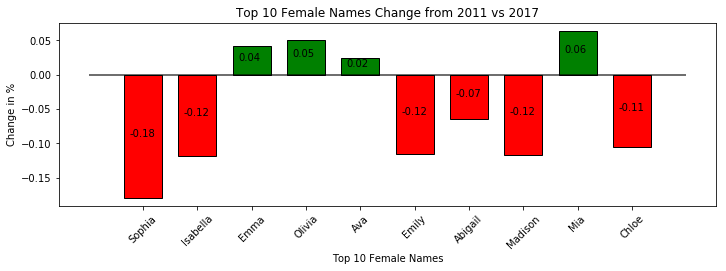

In [19]:
# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,3.5))
barchart = plt.bar(top10_df['name'],height=percentChanges,color=colors,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,10,alpha=0.75)
plt.title('Top 10 Female Names Change from 2011 vs 2017')
plt.ylabel('Change in %')
plt.xlabel('Top 10 Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.1,y=value.get_height()/2,s=round((value.get_height()),2))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/Top10Female_Change.png")

# Show the Figure
plt.show()

In [20]:
#Find names from 2011
#Arya (aka Arya Stark): Noble
#Arianne (aka Arianne Martell): Very holy one
#Asha (aka Asha Greyjoy): Life
#Brienne (aka Brienne of Tarth): Strong
#Catelyn (aka Cat Stark): Pure
#Cersei (aka Cersei Lannister): Enchantress
#Daenerys (aka Daenerys Targaryen): Born of the storm
#Ella (aka Ellaria Sand): Beautiful fairy
#Elia (aka Elia Sand): Jehovah is God
#Gilly (aka Gilly Craster): My joy

got_top10 = ['Arya','Arianne','Asha','Brienne','Catelyn','Cersei','Daenerys','Ella','Elia','Gilly']
got_female_df = merge_female.loc[merge_female['name'].isin(got_top10)]
got_female_df = got_female_df[['name','rank_y2011','name_percent_y2011','rank_y2017','name_percent_y2017','rankChange','percentChange','countChange']]
got_female_df = got_female_df.reset_index()        



In [21]:
#view got female df
got_female_df

index     name  rank_y2011  name_percent_y2011  rank_y2017  \
0     11     Ella        12.0            0.262492        16.0   
1    713     Arya       714.0            0.010597       135.0   
2   1197     Asha      1196.5            0.005504      1175.5   
3   1299     Elia      1299.5            0.004956      1085.5   
4   2230  Catelyn      2222.5            0.002328      4731.0   
5   2743  Arianne      2739.0            0.001753      2568.0   
6   8159  Brienne      8392.0            0.000383      4232.0   

   name_percent_y2017  rankChange  percentChange  countChange  
0            0.225982         4.0      -0.036511        -1572  
1            0.060796      -579.0       0.050199         1769  
2            0.005837       -21.0       0.000333            6  
3            0.006542      -214.0       0.001586           51  
4            0.000818      2508.5      -0.001510          -56  
5            0.001917      -171.0       0.000165            4  
6            0.000959     -4160.0       0.000575           20

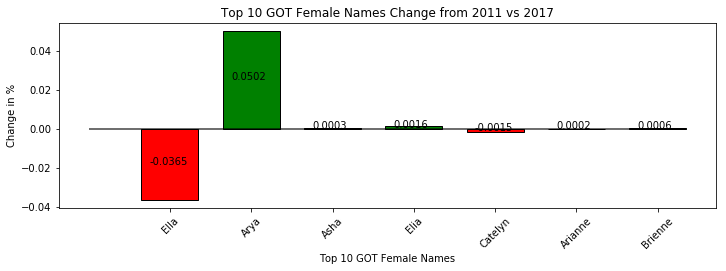

In [22]:
#set color for positive and negative change

percentChanges = []
percentChanges = got_female_df['percentChange']

colors = []
for value in range(0,len(percentChanges)):
    if percentChanges[value] < 0:
        colors.append('red')
    else:
        colors.append('green')


# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,3.5))
barchart = plt.bar(got_female_df['name'],height=percentChanges,color=colors,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,6,alpha=0.75)
plt.title('Top 10 GOT Female Names Change from 2011 vs 2017')
plt.ylabel('Change in %')
plt.xlabel('Top 10 GOT Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.1,y=value.get_height()/2,s=round((value.get_height()),4))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/Top10GOTFemale_Change.png")

# Show the Figure
plt.show()


In [23]:
#check datatypes
merge_female.dtypes

name                   object
gender_y2011           object
count_y2011             int64
year_y2011             object
yearTotal_y2011         int64
name_percent_y2011    float64
rank_y2011            float64
gender_y2017           object
count_y2017             int64
year_y2017             object
yearTotal_y2017         int64
name_percent_y2017    float64
rank_y2017            float64
rankChange            float64
percentChange         float64
countChange             int64
dtype: object

In [24]:
#rank of Arya index = 713
#find similarly ranked females around Ary's rank
similar_df = merge_female.iloc[710:717]
similar_df

name gender_y2011  count_y2011 year_y2011  yearTotal_y2011  \
710    Jaylin            F          390       2011          3651914   
711       Ali            F          388       2011          3651914   
712   Taliyah            F          388       2011          3651914   
713      Arya            F          387       2011          3651914   
714    Emilie            F          386       2011          3651914   
715  Destinee            F          385       2011          3651914   
716     Jaida            F          385       2011          3651914   

     name_percent_y2011  rank_y2011 gender_y2017  count_y2017 year_y2017  \
710            0.010679       711.0            F          235       2017   
711            0.010625       712.5            F          114       2017   
712            0.010625       712.5            F          293       2017   
713            0.010597       714.0            F         2156       2017   
714            0.010570       715.0            F          248       2017   
715            0.010542       717.0            F          156       2017   
716            0.010542       717.0            F          193       2017   

     yearTotal_y2017  name_percent_y2017  rank_y2017  rankChange  \
710          3546301            0.006627      1076.0       365.0   
711          3546301            0.003215      1807.0      1094.5   
712          3546301            0.008262       905.0       192.5   
713          3546301            0.060796       135.0      -579.0   
714          3546301            0.006993      1034.0       319.0   
715          3546301            0.004399      1444.5       727.5   
716          3546301            0.005442      1230.0       513.0   

     percentChange  countChange  
710      -0.004053         -155  
711      -0.007410         -274  
712      -0.002362          -95  
713       0.050199         1769  
714      -0.003577         -138  
715      -0.006143         -229  
716      -0.005100         -192

In [25]:
#set color for positive and negative change

countChanges_1 = []
countChanges_1 = similar_df['countChange']

colors_1 = []
for value in countChanges_1:
    print(value)
    if value < 0:
        colors_1.append('red')
    else:
        colors_1.append('green')

-155
-274
-95
1769
-138
-229
-192


<Figure size 432x288 with 0 Axes>

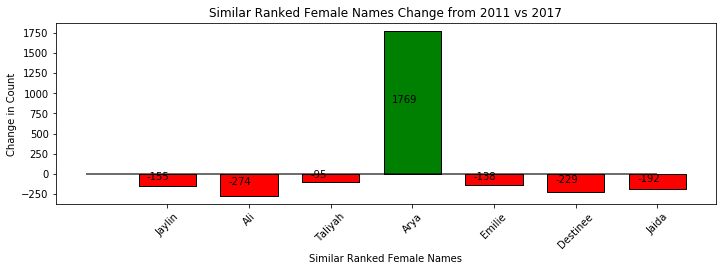

In [26]:
# Orient widths. Add labels, tick marks, etc. 
plt.gcf().subplots_adjust(bottom=0.15)
plt.figure(figsize=(10,3.5))
barchart = plt.bar(similar_df['name'],height=countChanges_1,color=colors_1,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,6,alpha=0.75)
plt.title('Similar Ranked Female Names Change from 2011 vs 2017')
plt.ylabel('Change in Count')
plt.xlabel('Similar Ranked Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.1,y=value.get_height()/2,s=round((value.get_height()),4))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/SimilarRankedFemales_Change.png",bbox_inches = "tight")

# Show the Figure
plt.show()

In [27]:
#average % change
print(f"Y2011 average: {merge_female['name_percent_y2011'].mean()}, Y2017 average: {merge_female['name_percent_y2017'].mean()}")
print(f"percent mean change: {merge_female['percentChange'].mean()}")


Y2011 average: 0.0033673149195342657, Y2017 average: 0.003384802902576191
percent mean change: 1.7487983041386802e-05


In [28]:
#Average of all other names
female_other = ['Jaylin','Ali','Taliyah','Emilie','Destinee','Jaida']
other_df = merge_female.loc[merge_female['name'].isin(female_other)]
avg_y2011 = other_df['name_percent_y2011'].mean()
avg_y2017 = other_df['name_percent_y2017'].mean()
arya_y2011 = merge_female.loc[merge_female['name']=='Arya']['name_percent_y2011'].sum()
arya_y2017 = merge_female[merge_female['name']=='Arya']['name_percent_y2017'].sum()
print(f"avg of percent change in 2011: {avg_y2011}, avg of percent change in 2017: {avg_y2017}")
print(f"arya 2011: {arya_y2011}, arya in 2017: {arya_y2017}")

avg of percent change in 2011: 0.010597182737600063, avg of percent change in 2017: 0.005822968777889976
arya 2011: 0.010597182737600064, arya in 2017: 0.060795741816613985


In [29]:
#create 2 x 2 for fisher exact
stat_df1 = pd.DataFrame([[avg_y2011],[avg_y2017]]).T
stat_df2 = pd.DataFrame([[arya_y2011],[arya_y2017]]).T
stat_df = pd.concat([stat_df1,stat_df2])
stat_df

0         1
0  0.010597  0.005823
0  0.010597  0.060796

In [30]:
#set list for similar names
sim_names = [x for x in set(similar_df["name"]) if x not in ["Arya"]]

In [31]:
#view list
sim_names

['Ali', 'Emilie', 'Jaida', 'Jaylin', 'Destinee', 'Taliyah']

In [32]:
#create df for observed vs expected for chi-square test
df_other_attempt = pd.DataFrame(similar_df[similar_df["name"].isin(sim_names)])
arya_only_df = similar_df[similar_df["name"] == "Arya"]
df_other_attempt["observed"] = df_other_attempt["count_y2017"] - df_other_attempt["count_y2011"]
df_other_attempt["expected"] = (arya_only_df["count_y2017"] - arya_only_df["count_y2011"]).values[0]

In [33]:
#view df
df_other_attempt[["name", "observed", "expected"]]

name  observed  expected
710    Jaylin      -155      1769
711       Ali      -274      1769
712   Taliyah       -95      1769
714    Emilie      -138      1769
715  Destinee      -229      1769
716     Jaida      -192      1769

In [44]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df_other_attempt['observed'], df_other_attempt['expected'])

Power_divergenceResult(statistic=12902.371396269078, pvalue=0.0)

### Statistically significant when using raw count of babies born. However, this is not normalized to the total babies born per year.

In [46]:
#run chi-sq test again
critical_value = stats.chi2.ppf(q = 0.95, df = 5)

In [47]:
# Run the chi square test with stats.chisquare()
oddsratio, pvalue = stats.fisher_exact([[0.010597,0.005823],[0.010597,0.060796]])
pvalue

1.0

### Not statistically significant (>0.05). 

In [40]:
#change scale again
a = [[15 * 1000, 14 * 1000], [11 * 1000, 12 * 1000]]

In [41]:
#run fisher exact for small sample
stats.fisher_exact(a)
#show odds ratio & p-value

(1.1688311688311688, 1.1256471147952207e-18)

### Our hypothesis testing statistical value was different when using chi-square vs linear regression. To test that increase of name 'Arya' was not at random, we felt using linear regression slope for male vs female was more appropriate.
### We changed our statistical testing to linear regression due to the small observed change (0.0502%). We could have used the raw count values, but since this is not normalized to total number of babies born that year, using chi-square with count values was not appropriate.
### Chi-Square did not result in a meaningful p-value. We tested with fisher exact method but changed the scale (x1000) to check if the small observed % mattered to statistical testing. Since the scale of the value mattered and our proportional testing methodologies were not appropriate, linear regression was the best methodology for this hypothesis testing.